# Import

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


np.random.seed(123)

# Exercises

## 1

In [114]:
s = pd.DataFrame(np.random.poisson(2,10**5))
s.head()

,0
0,2
1,4
2,2
3,2
4,2


$ \textrm{Poisson Distribution:} \\$
$$ P\left( x \right) = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}} $$

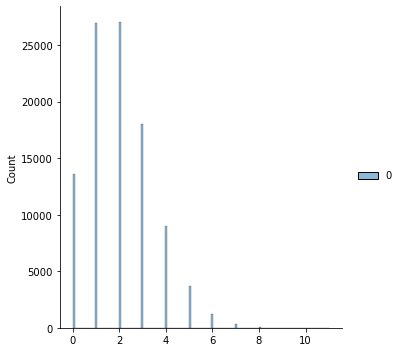

In [115]:
sns.displot(data = s)

Simulation: What is the probability that no cars drive up in the noon hour?

In [116]:
(s==0).mean()

0    0.13582
dtype: float64

Theoretical: What is the probability that no cars drive up in the noon hour?

In [117]:
stats.poisson(2).pmf(0)


0.1353352832366127

Simulation: What is the probability that 3 or more cars come through the drive through?

In [118]:
(s>=3).mean()

0    0.32392
dtype: float64

Theoretical: What is the probability that 3 or more cars come through the drive through?

In [119]:
stats.poisson(2).sf(2)

0.32332358381693654

Simulation: How likely is it that the drive through gets at least 1 car?

In [120]:
(s>=1).mean()

0    0.86418
dtype: float64

Theoretical: How likely is it that the drive through gets at least 1 car?

In [121]:
stats.poisson(2).sf(0)

0.8646647167633873

## 2

In [150]:
grades=pd.DataFrame(np.random.normal(3, 0.3, size=(10**5)))
grades.head(5)

,0
0,2.598858
1,3.370284
2,2.810819
3,2.364827
4,2.782643


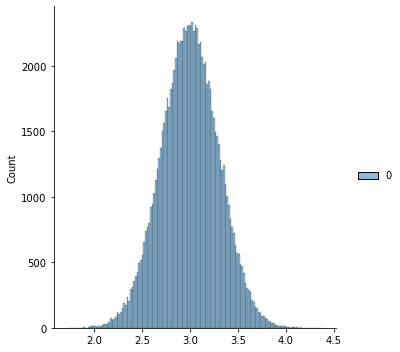

In [151]:
sns.displot(grades)

In [152]:
grades.sort_values(by=0, inplace=True, ignore_index=True)
grades.head()

,0
0,1.711797
1,1.796104
2,1.816985
3,1.860913
4,1.862108


In [213]:
grades.idxmax()

0    99999
dtype: int64

In [153]:
grade_95=int(0.95*grades.idxmax())
grade_95

94999

In [211]:
grades.quantile(0.95)

0    3.49409
Name: 0.95, dtype: float64

Simulation: What grade point average is required to be in the top 5% of the graduating class?

In [154]:
float(grades.values[grade_95].round(4))

3.4941

In [155]:
grade_15=int(0.15*grades.idxmax())
grade_15

14999

Simulation: What GPA constitutes the bottom 15% of the class?

In [156]:
float(grades.values[grade_15].round(4))

2.6893

In [171]:
third_decile=int(0.3*grades.idxmax())
third_decile

29999

In [177]:
second_decile=int(0.2*grades.idxmax())
second_decile

19999

Simulation: Determine the range of the third decile.

In [212]:
grades.quantile([0.2,0.3])

,0
0.2,2.746407
0.3,2.842612


In [180]:
# 3rd decile upper bound

float(grades.values[third_decile].round(4))

2.8426

In [182]:
# 3rd decile lower bound

float(grades.values[second_decile].round(4))

2.7464

Simulation: Would a student with a 2.8 grade point average qualify for this scholarship?

In [179]:
# Yes, 2.8 is inside the range of the 3rd-decile.

Simulation: If I have a GPA of 3.5, what percentile am I in?

In [163]:
f"{100*float((grades<=3.5).mean()):.3f}%"

'95.192%'

Theoretical: What grade point average is required to be in the top 5% of the graduating class?

In [164]:
stats.norm(3,0.3).ppf(0.95)

3.4934560880854417

Theoretical: What GPA constitutes the bottom 15% of the class?

In [165]:
stats.norm(3,0.3).ppf(0.15)

2.689069983151863

Theoretical: Determine the range of the third decile.

In [166]:
# 3rd decile upper bound

stats.norm(3,0.3).ppf(0.20)

2.7475136299281258

In [167]:
# 3rd decile lower bound

stats.norm(3,0.3).ppf(0.30)

2.842679846187588

Theoretical: Would a student with a 2.8 grade point average qualify for this scholarship?

In [168]:
# Yes, a 2.8 is within the range of the 3rd decile.

Theoretical: If I have a GPA of 3.5, what percentile am I in?

In [169]:
f"{100*float(stats.norm(3,0.3).cdf(3.5)):.3f}%"

'95.221%'

## 3 

Theoretical: How likely is it that this many people or more click through?

In [217]:
stats.binom(4326,0.02).sf(96)

0.13975823631416445